In [2]:
import cv2

import matplotlib.pyplot as plt

import numpy

In [5]:
## 닫힘 연산 -> 효과가 별로 없음

img1 = cv2.imread('./sr2/frame1655.png') #, cv2.IMREAD_GRAYSCALE
# 굳이 그레이로 설정해서 모폴을 할 필요가 있을까
# rgb 3채널로 동시에 모폴 연산후 합쳐짐
## 열림 : 주변보다 밝은 노이즈 제거 + 객체 분리, 돌출 모양 제거


## 닫힘 : 주변보다 어두운 노이즈 제거 + 객체 연결, 구멍 메꾸기
k = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
closing = cv2.morphologyEx(img1, cv2.MORPH_CLOSE , k)

cv2.imshow('original', img1)
cv2.imshow('closing', closing)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [36]:
## 열림 연산 -> 조금 흐려짐

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN , k)

cv2.imshow('original', img1)
cv2.imshow('opening', opening)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

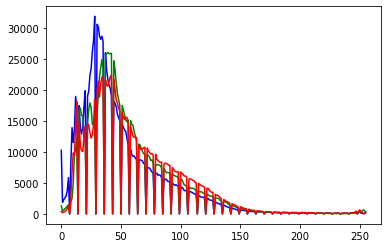

-1

In [3]:
## 히스토그램 확인

a = cv2.imread('./sr2/frame1655.png')
cv2.imshow('histogram', a)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(a)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

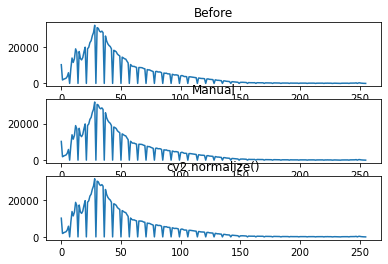

-1

In [4]:
## 정규화

#--① 그레이 스케일로 영상 읽기
b = cv2.imread('./sr2/frame1655.png') # , cv2.IMREAD_GRAYSCALE

#--② 직접 연산한 정규화
img_f = b.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

#--③ OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(b, None, 0, 255, cv2.NORM_MINMAX)

#--④ 히스토그램 계산
hist = cv2.calcHist([b], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', b)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

hists = {'Before' : hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(3,1,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [6]:
## 대비

img1 = cv2.imread('./sr2/frame1655.png') 

def contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    
    limg = cv2.merge((cl,a,b))
    
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    return final


img2 = contrast(img1)

cv2.imshow('original', img1)
cv2.imshow('contrast', img2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [14]:
img1 = cv2.imread('./sr2/frame1655.png') 

def run_histogram_equalization(img):
    # convert from RGB color-space to YCrCb
    ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    # equalize the histogram of the Y channel
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

    # convert back to RGB color-space from YCrCb
    equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

    cv2.imshow('equalized_img', equalized_img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

run_histogram_equalization(img1)

In [ ]:
# clahe = cv2.createCLAHE(clipLimit, tileGridSize)
# clipLimit: 대비(Contrast) 제한 경계 값, default=40.0

# tileGridSize: 영역 크기, default=8 x 8
# clahe: 생성된 CLAHE 객체

In [41]:
# 컬러 이미지 이퀄라이즈 <- 이게 가장 마음에 듬

#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread('./sr2/frame0.png')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
# before vs clahe
img = cv2.imread('./sr2/frame1655.png')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8)) #CLAHE 생성

img_clahe = img_yuv.copy()
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

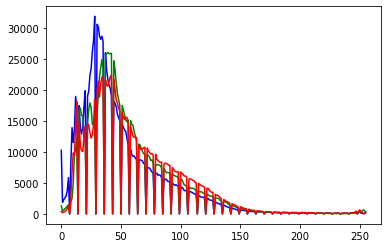

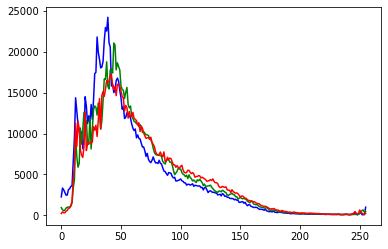

-1

In [11]:
## 히스토그램 확인

a = cv2.imread('./sr2/frame1655.png')
cv2.imshow('original', a)
cv2.imshow('clahe',img_clahe)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(a)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

channels2 = cv2.split(img_clahe)
for (ch, color) in zip (channels2, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [38]:
## 가장자리 검출 -> 진하게

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./sr2/frame0.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)[...,0]

def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

def getBordered(image, width):
    bg = np.zeros(image.shape)
    _, contours, _ = cv2.findContours(image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    biggest = 0
    bigcontour = None
    for contour in contours:
        area = cv2.contourArea(contour) 
        if area > biggest:
            biggest = area
            bigcontour = contour
    return cv2.drawContours(bg, [bigcontour], 0, (255, 255, 255), width).astype(bool) 

im2 = getBordered(image, 100)

show_img(im2, figsize=(10,10))

ValueError: not enough values to unpack (expected 3, got 2)

In [39]:
image

array([[27, 32, 44, ..., 52, 37, 31],
       [30, 35, 45, ..., 52, 39, 36],
       [37, 41, 49, ..., 51, 45, 46],
       ...,
       [37, 40, 46, ..., 36, 38, 39],
       [30, 33, 40, ..., 47, 40, 33],
       [26, 30, 37, ..., 48, 37, 30]], dtype=uint8)